In [1]:
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.5 MB/s eta 0:00:00


In [2]:
from matplotlib.figure import Figure
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# print(f"{type(df_world)}, {df_world.geometry.name}")
# print(df_world.head())
# print(df_world.geometry.geom_type.value_counts())

In [4]:
# df_world.plot(figsize=(10,6))

# Ratings

In [5]:
df = pd.ExcelFile("/kaggle/input/finance/ctryprem.xlsx")
df = df.parse("Sovereign Ratings (Moody's,S&P)")
df = df[['Country', "Moody's rating"]]
df.loc[len(df.index)] = ['North Korea', 'Aa2']
df.to_csv("MoodysRatings.csv", index=False)

In [6]:
df['Country'] = df['Country'].replace(['United States', 'Korea', 'Abu Dhabi', 'Yemen, Republic', 'Czech Republic',  'Congo (Democratic Republic of)', 'Dominican Republic', 'Swaziland'], ['United States of America', 'South Korea', 'United Arab Emirates', 'Yemen', 'Czechia', 'Dem. Rep. Congo', 'Dominican Rep.', 'eSwatini'])
df["Moody's rating"] = df["Moody's rating"].replace(['A1', 'A2', 'A3', 'Aa1', 'Aa2', 'Aa3', 'Aaa', 'B1', 'B2', 'B3', 'Ba1', 'Ba2', 'Ba3', 'Baa1', 'Baa2', 'Baa3', 'C1', 'C2', 'C3', 'Ca1', 'Ca2', 'Ca3', 'Caa1', 'Caa2', 'Caa3', 'Ca'], ['A', 'A', 'A', 'Aa', 'Aa', 'Aa', 'Aaa', 'B', 'B', 'B', 'Ba', 'Ba', 'Ba', 'Baa', 'Baa', 'Baa', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'])

In [7]:
geopandas_countries = set(df_world['name'].unique().tolist())
teams_countries = set(df['Country'].unique().tolist())
print("geopandas_countries", len(geopandas_countries), "teams_countries", len(teams_countries))
print("Countries in teams but not found in the geo dataset")
diff_country_names = list(teams_countries-geopandas_countries)
# diff_country_names

geopandas_countries 177 teams_countries 157
Countries in teams but not found in the geo dataset


In [8]:
rem_countries = list(geopandas_countries - teams_countries)

In [9]:
for c in rem_countries:
    df.loc[len(df.index)] = [c, 'ND']
df.to_csv("MoodysRatings.csv", index=False)

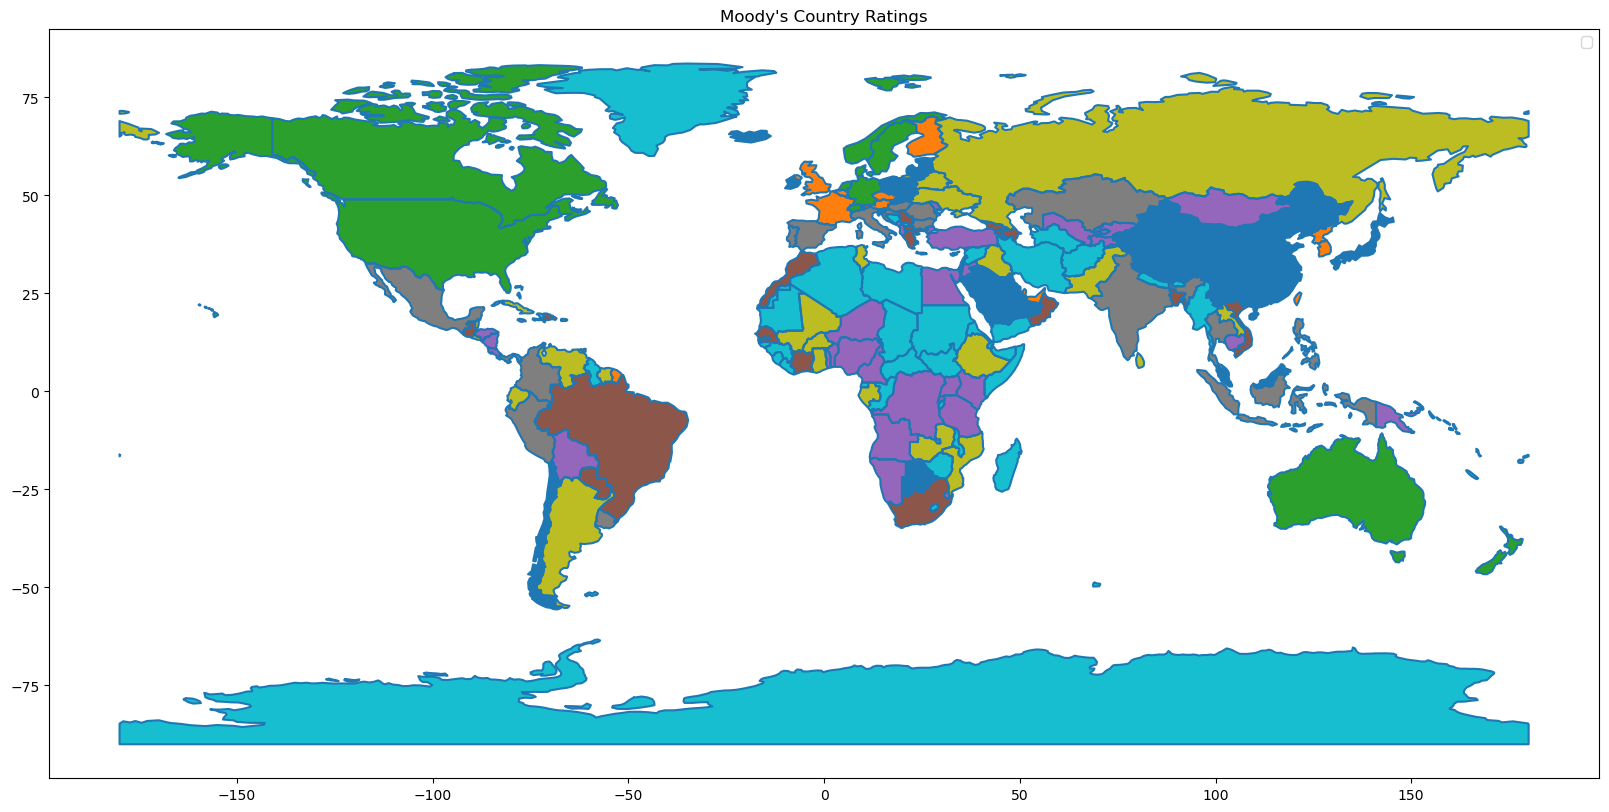

In [10]:
df_world_teams = df_world.merge(df, how="left", left_on=['name'], right_on=['Country'])
ax = df_world["geometry"].boundary.plot(figsize=(20,16))
color_dict = {'A': 'blue', 'Aa': 'orange', 'Aaa': 'green', 'B': 'red', 'Ba': 'purple', 'Baa': 'brown', 'C': 'pink',  'NA': 'gray'}
df_world_teams.plot( column="Moody's rating", ax=ax, legend=True) 
plt.title("Moody's Country Ratings")
plt.legend()
plt.show()

In [11]:
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in color_dict.values()]


In [12]:
custom_points

In [13]:
ax.add_artist(ax.legend(custom_points, color_dict.keys()))
plt.show()

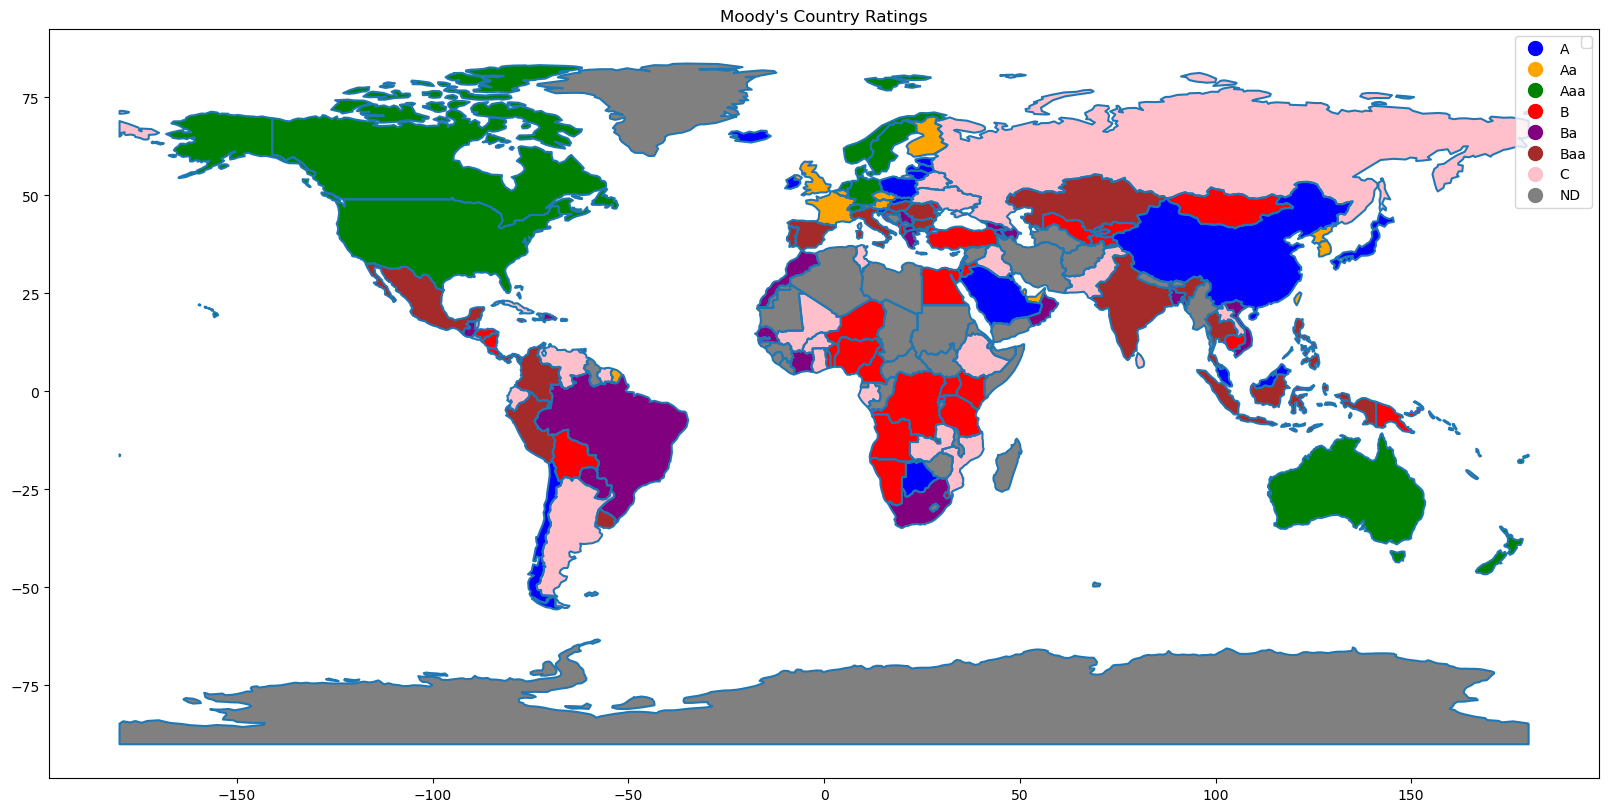

In [14]:
df_world_teams = df_world.merge(df, how="left", left_on=['name'], right_on=['Country'])
ax = df_world["geometry"].boundary.plot(figsize=(20,16))
color_dict = {'A': 'blue', 'Aa': 'orange', 'Aaa': 'green', 'B': 'red', 'Ba': 'purple', 'Baa': 'brown', 'C': 'pink',  'ND': 'gray'}
df_world_teams["Colors"] = df_world_teams["Moody's rating"].map(color_dict)
df_world_teams.plot(ax = ax, color = df_world_teams["Colors"])
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in color_dict.values()]
leg_points = ax.legend(custom_points, color_dict.keys())
ax.add_artist(leg_points)
plt.title("Moody's Country Ratings")
plt.legend()
plt.show()

# Countries ERP

In [15]:
df = pd.ExcelFile("/kaggle/input/finance/ctryprem.xlsx")
df = df.parse("ERPs by country")
countries = df[6:163]["Country and Equity Risk Premiums"].tolist()
countries.extend(df[165:185]["Country and Equity Risk Premiums"])
terp = df[6:163]["Unnamed: 7"].tolist() 
terp.extend(df[165:185]["Unnamed: 2"])

In [16]:
data = {'Countries': countries,
        'ERP': terp}
df = pd.DataFrame(data)
df.to_csv("ERP.csv", index=False)

In [17]:
df = df.dropna()

In [18]:
df['Countries'] = df['Countries'].replace(['United States', 'Korea, D.P.R.', 'Abu Dhabi', 'Yemen, Republic', 'Czech Republic', 'Korea'], ['United States of America', 'North Korea', 'United Arab Emirates', 'Yemen', 'Czechia', 'South Korea'])

In [19]:
df['ERP'] = df['ERP'].apply(lambda x:x*100)
df.reset_index(drop=True,inplace=True)

In [20]:
df_world_teams = df_world.merge(df, how="left", left_on=['name'], right_on=['Countries'])
df_world_teams['ERP'] = df_world_teams['ERP'].apply(lambda x: x if x <= 30 else 30)
df_world_teams.to_csv("ERP_p.csv", index=False)

YlGnBu_r


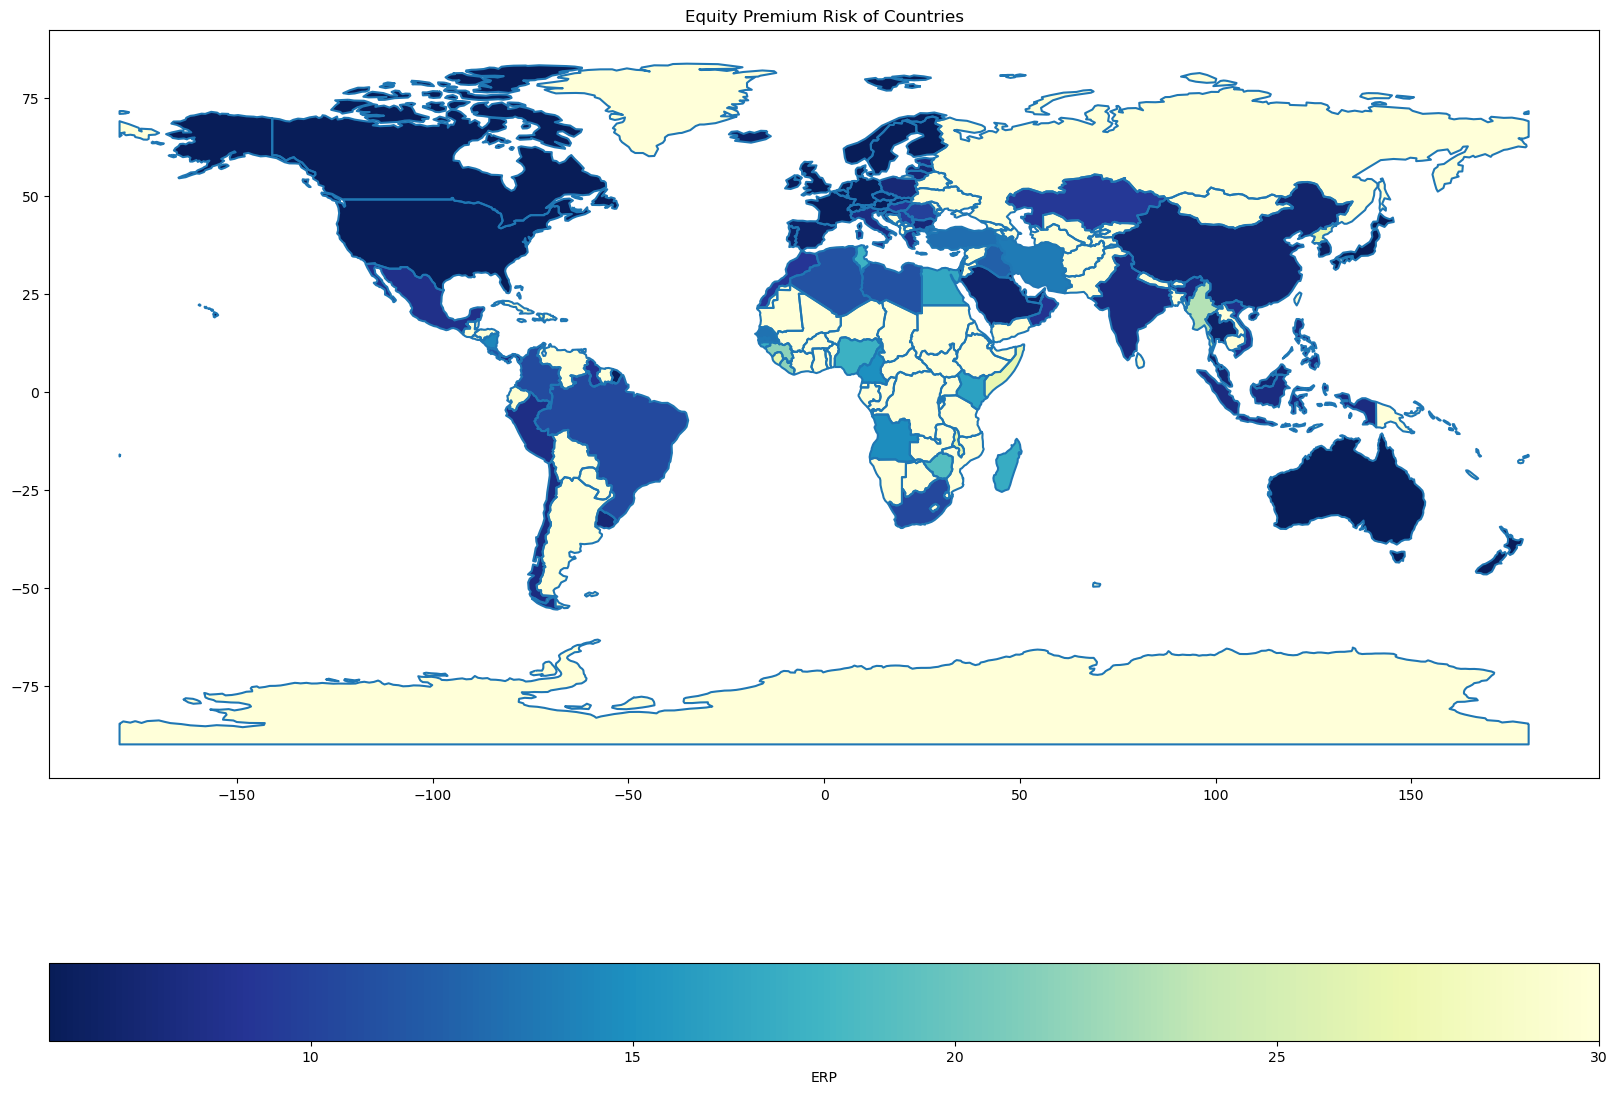

In [21]:
# cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
# cmaps = ['GnBu_r', 'PuBu_r', 'Wistia_r', 'YlGnBu_r']
cmaps = ['YlGnBu_r']
for c in cmaps:
    print(c)
    ax = df_world["geometry"].boundary.plot(figsize=(20,16))
    df_world_teams.plot( column="ERP", ax=ax, cmap=c, 
                         legend=True, legend_kwds={"label": "ERP", "orientation":"horizontal"}) #RdYlGn_r
    plt.title("Equity Premium Risk of Countries")
    plt.show()
    


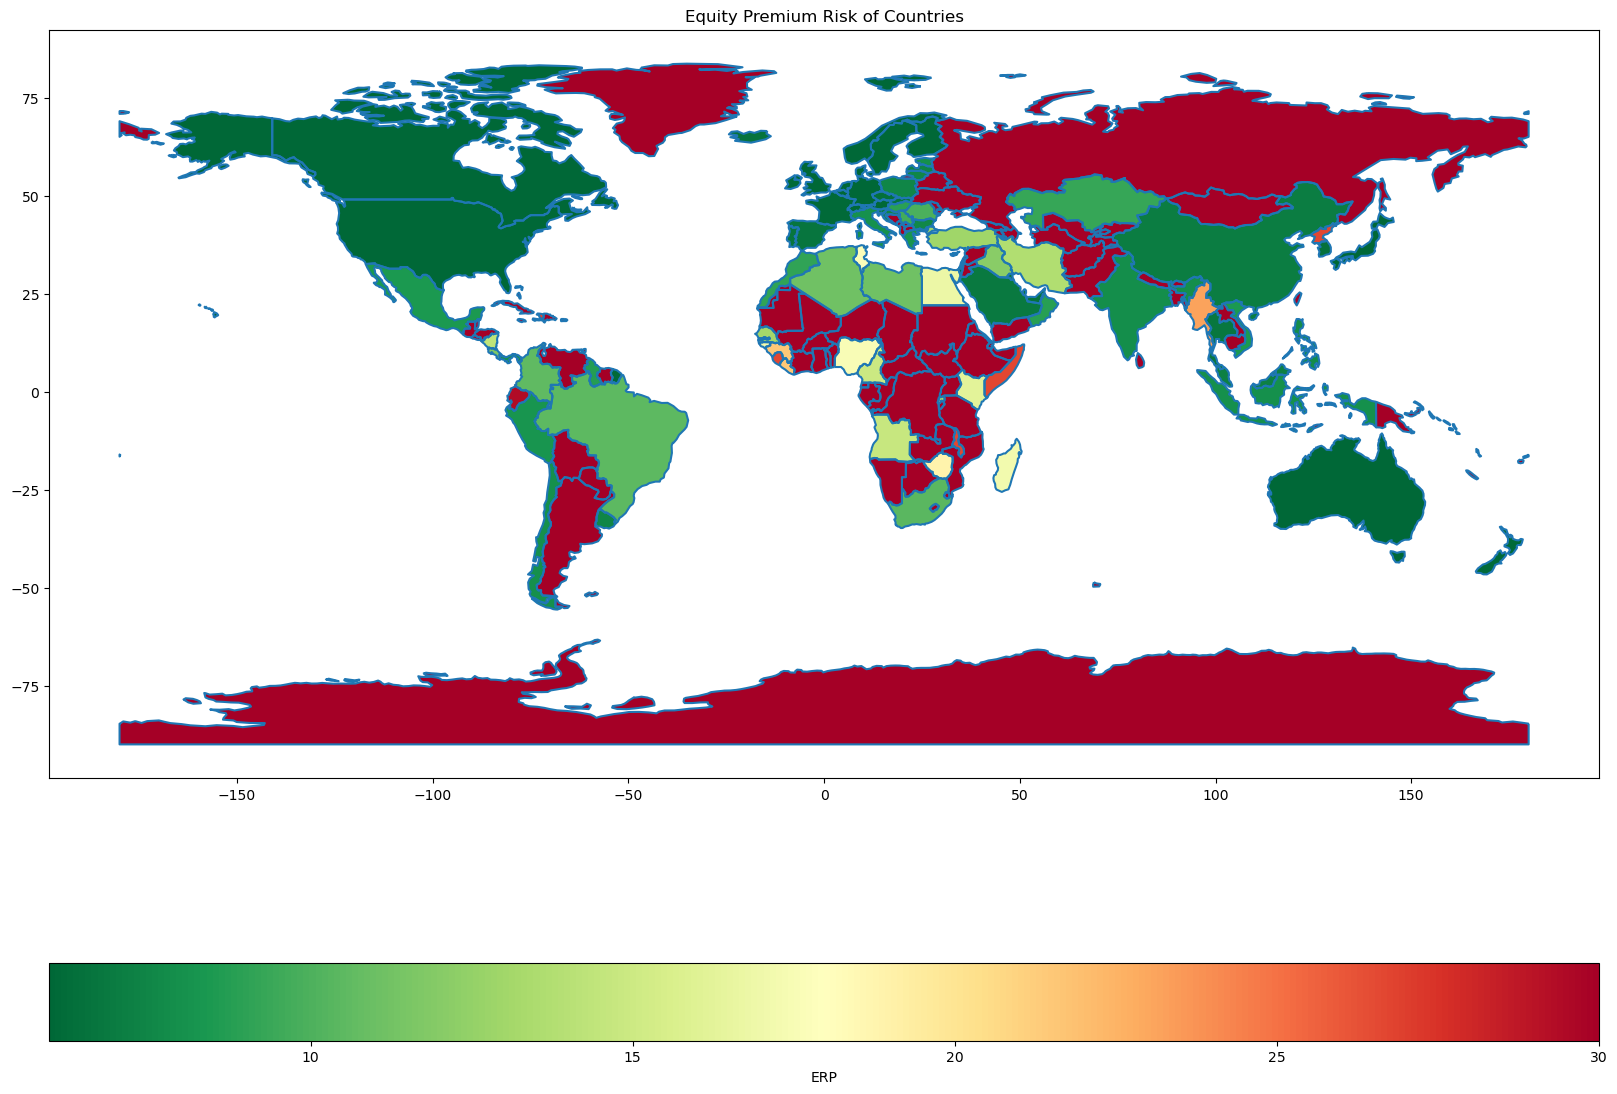

In [22]:
ax = df_world["geometry"].boundary.plot(figsize=(20,16))
df_world_teams.plot( column="ERP", ax=ax, cmap='RdYlGn_r', 
                     legend=True, legend_kwds={"label": "ERP", "orientation":"horizontal"}) #RdYlGn_r
plt.title("Equity Premium Risk of Countries")
plt.show()

# Implied ERP

In [23]:
df = pd.ExcelFile("/kaggle/input/finance/histimpl.xls")
df = df.parse("Historical Impl Premiums")

In [24]:
year = df[7:69]['Date updated:'].tolist()
ierp = df[7:69]['Unnamed: 15'].tolist()
tbr = df[7:69]['Unnamed: 10'].tolist()
data = {'Year': year,
        'Implied_ERP': ierp, 
       'T_Bond_Rate' : tbr}
df = pd.DataFrame(data)
df['Implied_ERP'] = df['Implied_ERP'].apply(lambda x:x*100)
df['T_Bond_Rate'] = df['T_Bond_Rate'].apply(lambda x:x*100)
df.to_csv("Implied.csv", index=False)

Text(0, 0.5, 'IERP')

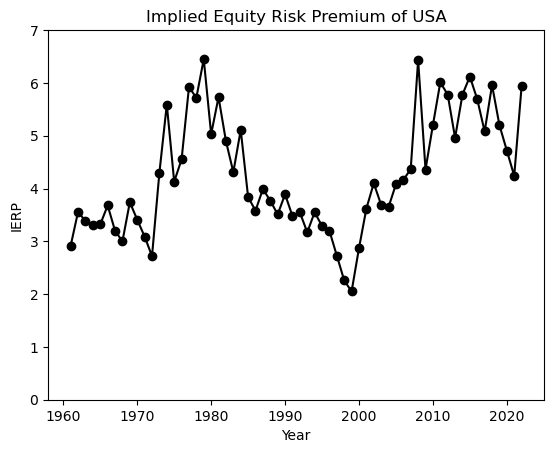

In [25]:
plt.ylim(0, 7)
plt.scatter(df['Year'], df['Implied_ERP'], linestyle="-", marker="o", c = "black")
plt.plot(df['Year'], df['Implied_ERP'], c="black")
plt.title("Implied Equity Risk Premium of USA")
plt.xlabel("Year")
plt.ylabel("IERP")

Text(0, 0.5, 'Return')

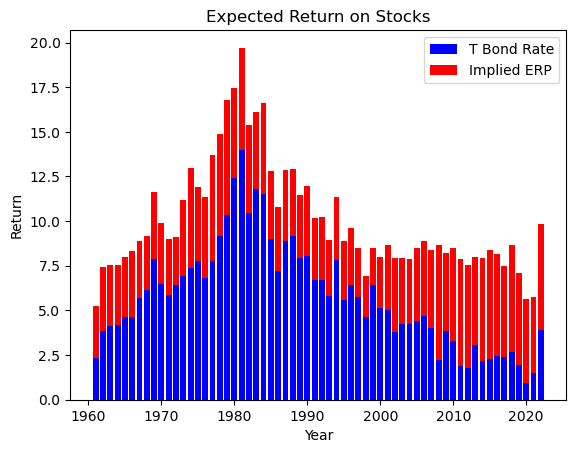

In [26]:
plt.bar(df['Year'], df['T_Bond_Rate'], color='b', label = "T Bond Rate")
plt.bar(df['Year'], df['Implied_ERP'], bottom=df['T_Bond_Rate'], color='r', label = "Implied ERP")
plt.legend(["T Bond Rate", "Implied ERP"])
plt.title("Expected Return on Stocks")
plt.xlabel("Year")
plt.ylabel("Return")

# Returns

In [27]:
df = pd.ExcelFile("/kaggle/input/finance/histretSP.xls")
df = df.parse("Returns by year")

In [28]:
year = df[17:112]['Date updated:'].tolist()
gold_return = df[17:112]['Unnamed: 23'].tolist()
sp_return = df[17:112]['Unnamed: 18'].tolist()
sp_return_div = df[17:112]["SP"].tolist()
ten_return = df[17:112]['Unnamed: 20'].tolist()
data = {'Year': year,
        'Gold_Return': gold_return,'SP_Return':sp_return, 'Ten_Return':ten_return, "SP_Return_div":sp_return_div}
df = pd.DataFrame(data)
df['Gold_Return'] = df['Gold_Return'].apply(lambda x:x*100)
df['SP_Return'] = df['SP_Return'].apply(lambda x:x*100)
df['Ten_Return'] = df['Ten_Return'].apply(lambda x:x*100)
df['SP_Return_div'] = df['SP_Return_div'].apply(lambda x:x*100)
df.to_csv("Returns.csv", index=False)

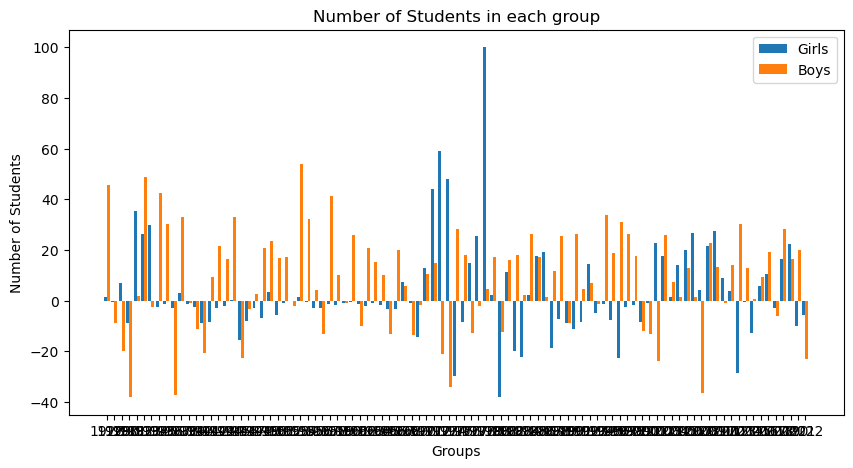

In [29]:
X = df['Year']
Ygirls = df['Gold_Return']
Zboys = df['SP_Return']
  
X_axis = np.arange(len(X))
  
fig = plt.figure(figsize = (10, 5))
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.locator_params(axis='x', nbins=10)


plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

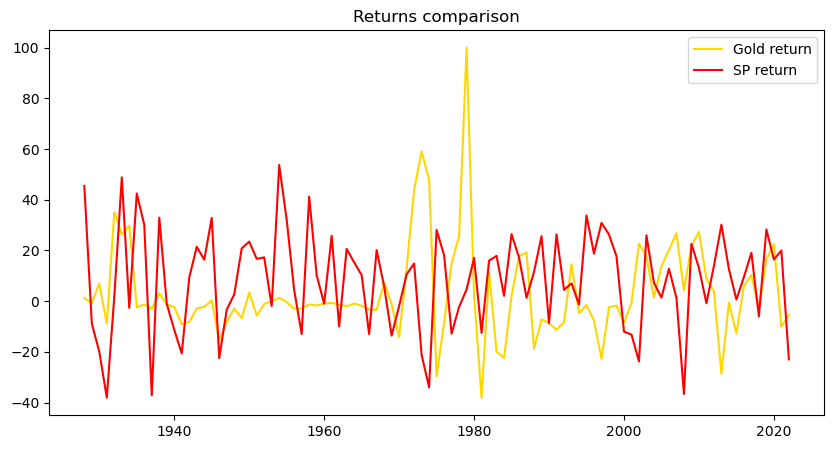

In [30]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df['Year'], df['Gold_Return'], label ='Gold return', color = 'gold')
plt.plot(df['Year'], df['SP_Return'], label ='SP return', color = 'red')
# plt.plot(df['Year'], df['Ten_Return'], label ='10 Year Bond return')
plt.title("Returns comparison")
plt.legend()
plt.show()

# Yearly gold, house, sp returns

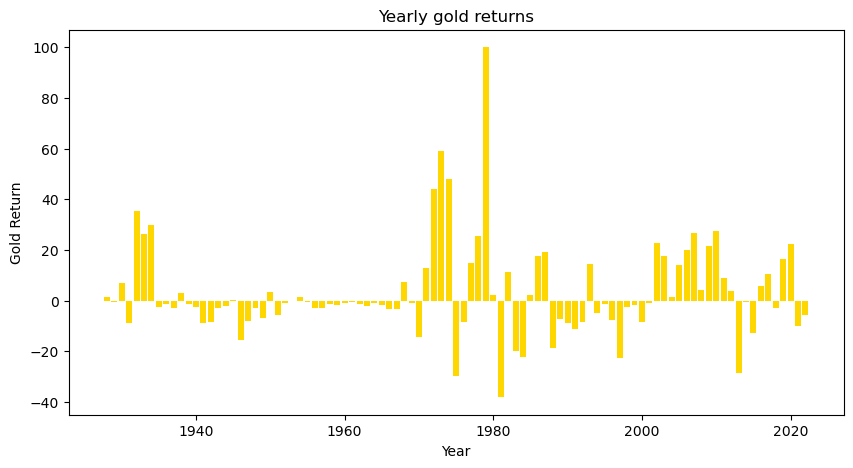

In [31]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df['Year'], df['Gold_Return'], color='gold')
plt.xlabel("Year")
plt.ylabel("Gold Return")
plt.title("Yearly gold returns")
plt.show()

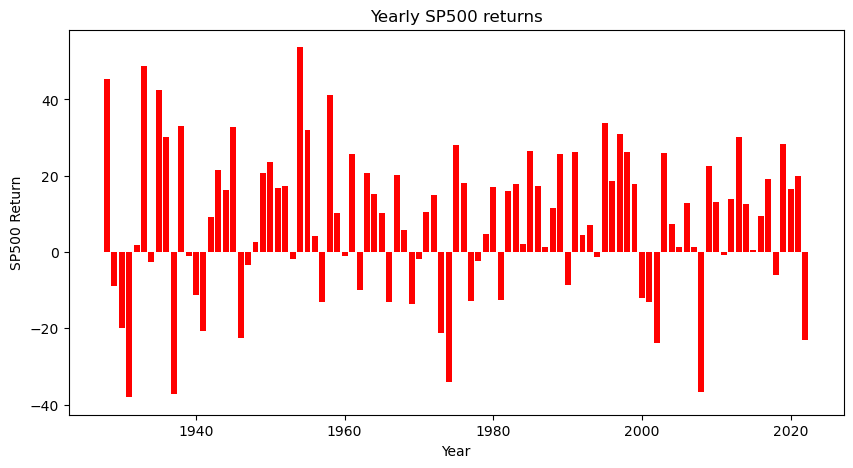

In [32]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df['Year'], df['SP_Return'], color = 'red')
plt.xlabel("Year")
plt.ylabel("SP500 Return")
plt.title("Yearly SP500 returns")
plt.show()

In [33]:
df = pd.ExcelFile("/kaggle/input/finance/histretSP.xls")
df = df.parse("Gold Prices")

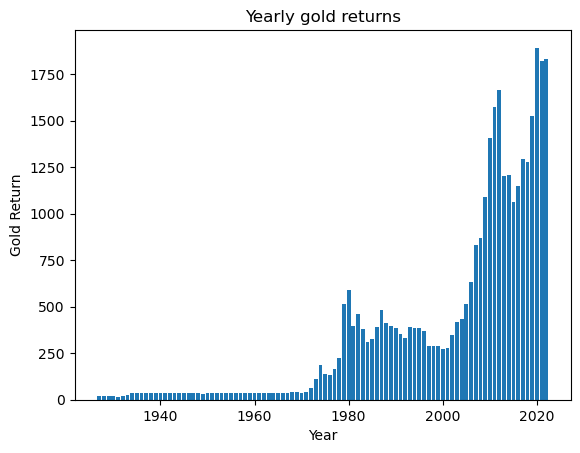

In [34]:
plt.bar(df['Year'], df['Price per oz'])
plt.xlabel("Year")
plt.ylabel("Gold Return")
plt.title("Yearly gold returns")
plt.show()

In [35]:
df = pd.ExcelFile("/kaggle/input/finance/histretSP.xls")
df = df.parse("Home Prices (Raw Data)")
year = df[8:140]["Home Price data from Robert Shiller's website."].tolist()
re_return = df[8:140]['Unnamed: 2'].tolist()
data = {'Year': year,
        'Housing_Return': re_return}
df = pd.DataFrame(data)
df['Housing_Return'] = df['Housing_Return'].apply(lambda x:x*100)
df.to_csv("Housing.csv", index=False)

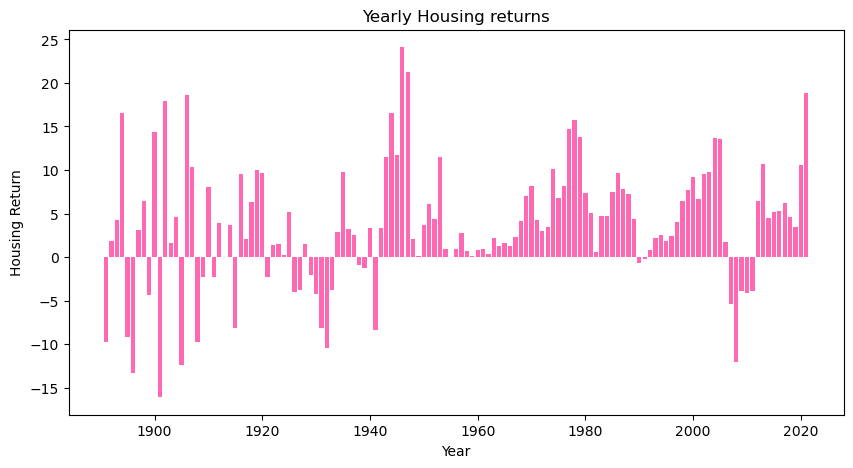

In [36]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df['Year'], df['Housing_Return'], color = 'hotpink')
plt.xlabel("Year")
plt.ylabel("Housing Return")
plt.title("Yearly Housing returns")
plt.show()

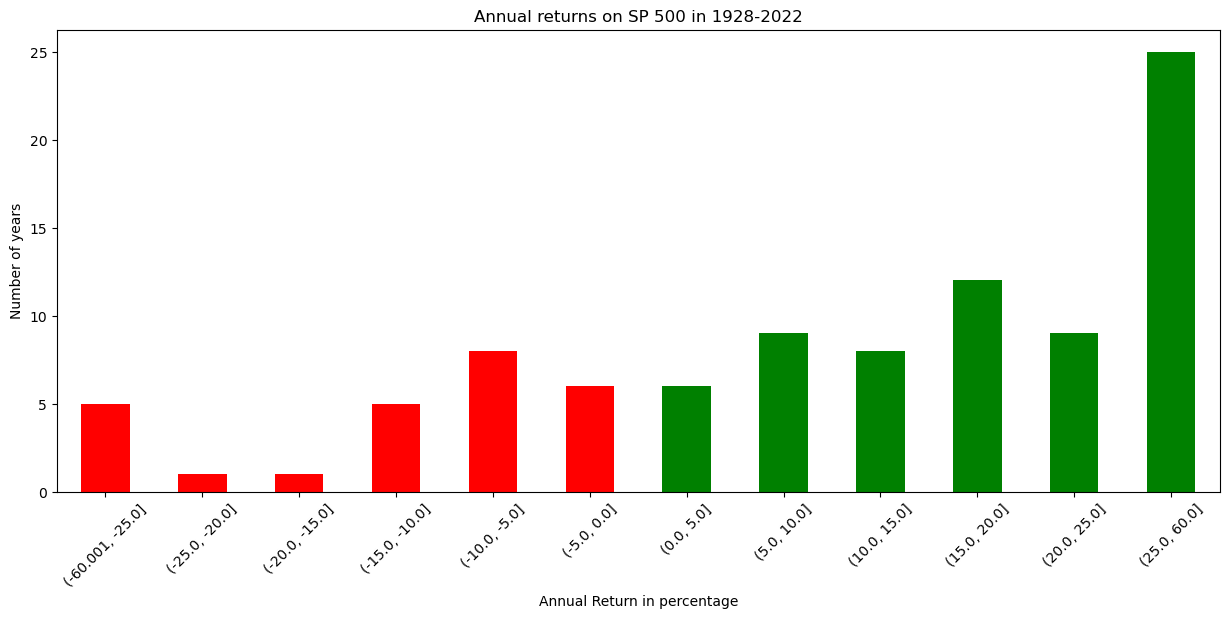

In [37]:
df = pd.read_csv("Returns.csv")
out = pd.cut(df['SP_Return_div'], bins=[-60, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 60], include_lowest=True)
ddf = out.value_counts(sort=False).rename_axis('unique_values').reset_index(name='counts')
ddf['positive'] = [False]*6 + [True]*6
ax = ddf['counts'].plot(kind='bar',color=ddf.positive.map({True: 'g', False: 'r'}), figsize=(15,6))
ax.set_xticklabels(ddf['unique_values'])
plt.ylabel("Number of years")
plt.xlabel("Annual Return in percentage")
plt.xticks(rotation=45)
plt.title("Annual returns on SP 500 in 1928-2022")
plt.show()

# Inflation, gdp

In [38]:
df = pd.ExcelFile("/kaggle/input/finance/histretSP.xls")
df = df.parse("Inflation Rate")

In [39]:
year = df[57:118]['FRED Graph Observations'].tolist()
year.append(2022)
inflation = df[57:118]['Unnamed: 1'].tolist()
inflation.append(6.5)

In [40]:
df = pd.read_csv("/kaggle/input/finance/united-states-gdp-growth-rate.csv")
gdp_growth = df[' GDP Growth (%)'].tolist()

In [41]:
data = {'Year': year,
        'Inflation': inflation,'GDP Growth':gdp_growth}
df = pd.DataFrame(data)
df.to_csv("Inflation.csv", index=False)

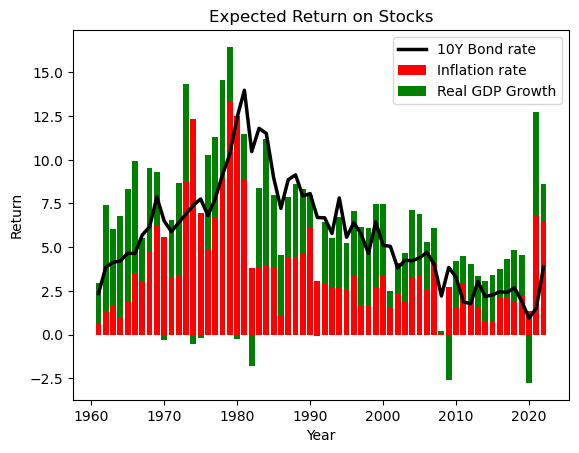

In [42]:
data = np.array([inflation, gdp_growth])

data_shape = np.shape(data)

# Take negative and positive data apart and cumulate
def get_cumulated_array(data, **kwargs):
    cum = data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(data))
    d[1:] = cum[:-1]
    return d  

cumulated_data = get_cumulated_array(data, min=0)
cumulated_data_neg = get_cumulated_array(data, max=0)

# Re-merge negative and positive data.
row_mask = (data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

cols = ["r", "g"]
l = ["Inflation rate", "Real GDP Growth"]

fig = plt.figure()
ax = plt.subplot(111)

for i in np.arange(0, data_shape[0]):
    ax.bar(year, data[i], bottom=data_stack[i], color=cols[i], label = l[i])

df = pd.read_csv("Implied.csv")    
plt.plot(year, df['T_Bond_Rate'], c="black", label="10Y Bond rate", linewidth=2.5)
plt.legend()
plt.title("Expected Return on Stocks")
plt.xlabel("Year")
plt.ylabel("Return")
plt.show()